
#            TP Identification de paramètres d'un robot RRR par techniques des moindres carrées #



Soit le robot RRR correspondant à la figure suivante:

![alternative text](robot-rrr3-sol.png)

- La configuration du robot est défini par le vecteur $q = (q_1, q_2, q_3)^t$.

- La situation de l'outil est défini par le vecteur $X = (x, y, z)^t$ .

## Objectif
L'objectif est d'identifier certains paramètres géométriques du robot plan RRR.

A l'aide d'une caméra, on a mesuré le vecteur $X$ pour un ensemble de configurations $q$. On considère que toutes les mesures sont exactes (pas d'erreurs liées au système de mesure).

Les résultats se trouvent dans les fichier *mesuresX.dat*. Chaque ligne comporte une mesure avec la convention suivante pour les 6 valeurs:

$q_1$, $q_2$, $q_3$, x, y, z sur chaque ligne (format %12.6f pour chaque valeur). Les longueurs sont exprimés en mètre.

- A: Dans un premier temps on veut identifier les longueurs des liaisons $a$, $b$, $c$ du robot RRR en considérant que les valeurs des angles $q_i$ sont exactes.

Fichier de mesure: *mesures1.dat*


## Travail

Modéliser le problème comme un problème d'optimisation

Implémenter votre problème et le résoudre 


In [2]:
#################################################   
# Import 
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time
from random import *
from numpy.linalg import inv,cond
from scipy.optimize import root
from scipy.optimize import least_squares

In [3]:
#################################################   
# Calcul du MGD du robot RRR
# INPUT:  q = vecteur de configuration (deg, deg, deg)
# OUTPUT: Xc = vecteur de situation = position3D = (x,y,z) 
def mgd(qdeg,a,b,c):
    qrad=np.deg2rad(qdeg)
    # introduction d'un eerreur su run qi
    # erreur= 5 (en degré)
    # erg = np.deg2rad(erreur)
    # qrad[i] = qi + erg
    c1= np.cos(qrad[0])
    s1=np.sin(qrad[0])
    c23= np.cos(qrad[2]+qrad[1])
    s23= np.sin(qrad[2]+qrad[1])
    c2=np.cos(qrad[1])
    s2=np.sin(qrad[1])
    x= a*c1*c2 + b*c1*c23 
    y= a*s1*c2 + b*s1*c23 
    z= a*s2 + b*s23 + c 
    Xd=[x,y,z]
    return Xd

#

In [4]:
# Lecture mesures de fichier

with open("mesures1.dat", "r") as f:
    line= list()

    donnees= list()
    xdata= list()
    qdata= list()
    q1data= list()
    q2data= list()
    q3data= list()
    for line in f:
        if "#" in line:
            # on saute la ligne
            continue
        data = line.split()
        donnees.append((float(data[0]), float(data[1]),float(data[2]), float(data[3]), float(data[4]),float(data[5])))
        xdata.append([float(data[3]), float(data[4]),float(data[5])])
        qdata.append([float(data[0]), float(data[1]),float(data[2])])
        q1data.append(float(data[0]))
        q2data.append(float(data[1]))
        q3data.append(float(data[2]))
#donnees
#xdata


In [5]:
# Lecture mesures exactes

with open("mesuresExactes.dat", "r") as f:
    line= list()

    donnees_mE= list()
    xdata_mE= list()
    qdata_mE= list()
    q1data_mE= list()
    q2data_mE= list()
    q3data_mE= list()
    for line in f:
        if "#" in line:
            # on saute la ligne
            continue
        data_mE = line.split()
        donnees_mE.append((float(data_mE[0]), float(data_mE[1]),float(data_mE[2]), float(data_mE[3]), float(data_mE[4]),float(data_mE[5])))
        xdata_mE.append([float(data_mE[3]), float(data_mE[4]),float(data_mE[5])])
        qdata_mE.append([float(data_mE[0]), float(data_mE[1]),float(data_mE[2])])
        q1data_mE.append(float(data_mE[0]))
        q2data_mE.append(float(data_mE[1]))
        q3data_mE.append(float(data_mE[2]))
#donnees
#xdata


In [6]:
# Lecture mesures des Capteurs

with open("mesuresCapteurs.dat", "r") as f:
    line= list()

    donnees_mC= list()
    xdata_mC= list()
    qdata_mC= list()
    q1data_mC= list()
    q2data_mC= list()
    q3data_mC= list()
    for line in f:
        if "#" in line:
            # on saute la ligne
            continue
        data_mC = line.split()
        donnees_mC.append((float(data_mC[0]), float(data_mC[1]),float(data_mC[2]), float(data_mC[3]), float(data_mC[4]),float(data_mC[5])))
        xdata_mC.append([float(data_mC[3]), float(data_mC[4]),float(data_mC[5])])
        qdata_mC.append([float(data_mC[0]), float(data_mC[1]),float(data_mC[2])])
        q1data_mC.append(float(data_mC[0]))
        q2data_mC.append(float(data_mC[1]))
        q3data_mC.append(float(data_mC[2]))
#donnees
#xdata


In [7]:
import numpy as np

# Initialisation des paramètres a, b, et c
initial_guess = np.array([1.0, 1.0, 1.0])

# Construction de la matrice A et B
A=[]
B=[]
for i in range(len(qdata)):

    q1=np.deg2rad(q1data)
    q2=np.deg2rad(q2data)
    q3=np.deg2rad(q3data)

    c1=np.cos(q1[i])
    c2=np.cos(q2[i])
    s1=np.sin(q1[i])
    s2=np.sin(q2[i])
    c23=np.cos(q3[i]+q2[i])
    s23=np.sin(q3[i]+q2[i])

    A.append([c1*c2,c1*c23,0])
    A.append([s1*c2,s1*c23,0])
    A.append([s2,s23,1])

    B.append(xdata[i][0])
    B.append(xdata[i][1])
    B.append(xdata[i][2])

# Calcul des paramètres optimaux à l'aide de la formule des moindres carrés
params_optimal = np.linalg.inv(np.transpose(A).dot(A)).dot(np.transpose(A)).dot(B) 

# Les valeurs optimales de a, b, et c sont dans params_optimal
a_optimal, b_optimal, c_optimal = params_optimal

# Affichage des résultats
print("Valeurs optimales de a, b et c :")
print("a_optimal =", a_optimal)
print("b_optimal =", b_optimal)
print("c_optimal =", c_optimal)

Valeurs optimales de a, b et c :
a_optimal = 3.9970453232530234
b_optimal = 2.4995117574731838
c_optimal = 3.2966481231191844


### Test du MGD après identification

Vérifier que votre identification des longueurs $a$, $b$ et $c$ est correcte.

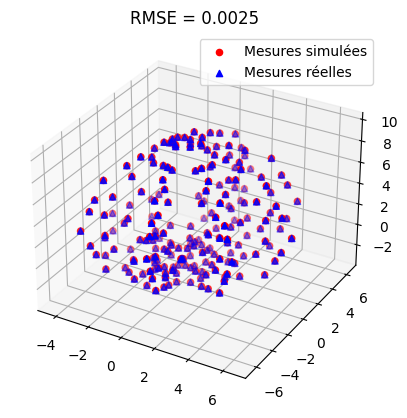

RMSE entre les mesures simulées et réelles : 0.0025


In [59]:
# Générer des configurations q pour la simulation (par exemple, aléatoirement)
num_samples = len(xdata_mE)

# Simuler les mesures avec les paramètres identifiés
x_simulated = [mgd(q, a_optimal, b_optimal, c_optimal) for q in qdata_mE[:num_samples]]

# Comparaison des mesures simulées et du sous-ensemble des mesures réelles
x_reel = xdata_mE[:num_samples]

# Calcul de l'erreur RMSE
rmse = np.sqrt(np.mean((np.array(x_simulated) - np.array(x_reel))**2))

# Visualisation
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*x_simulated), label='Mesures simulées', c='r', marker='o')
ax.scatter(*zip(*x_reel), label='Mesures réelles', c='b', marker='^')
plt.legend()
plt.title(f'RMSE = {rmse:.4f}')
plt.show()

# Affichage du RMSE
print(f"RMSE entre les mesures simulées et réelles : {rmse:.4f}")

## Utilisation de scipy optimize

Retrouver vos résultats en utilisant directement les fonctions de scipy optimize

In [60]:
from scipy.optimize import nnls

array,_ = nnls(A,B)

# Affichage des résultats
print("Valeurs optimales de a, b et c :")
print("a_optimal =", array[0])
print("b_optimal =", array[1])
print("c_optimal =", array[2])

Valeurs optimales de a, b et c :
a_optimal = 3.997045323253023
b_optimal = 2.4995117574731887
c_optimal = 3.296648123119169


# Conclusion

Que ce soit par méthode analytique ou via la bibliothèque logicielle scipy.optimize on trouve les résultats suivants :
* a_optimal = 3.997045323253023
* b_optimal = 2.4995117574731887
* c_optimal = 3.296648123119169

Ceux-ci nous donnent une erreur quadratique de 0.025